In [26]:
import numpy as np
import pandas as pd
import collections

import scipy
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata, interp2d
import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP7

import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from matplotlib.colors import LogNorm

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

os.chdir('/Users/nitya/Work/Data/Project2')

In [4]:
d1 = pd.read_csv('offset_mlratio_nearest_nonmodel_0.02.csv')
d2 = pd.read_csv('offset_mlratio_nearest_nonmodel_0.06.csv')
d3 = pd.read_csv('offset_mlratio_nearest_nonmodel_0.14.csv')
d1.columns

Index(['Unnamed: 0', 'plate_ifu', 'z', 'hd_z', 'd4_z', 'hd_all', 'd4_all',
       'offset_hd', 'offset_d4', 'mlz_z', 'mlz_all', 'offset_mlz'],
      dtype='object')

In [5]:
print(len(d1))
tcount = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['z'],
                             statistic = 'count',bins=(30,30))
b = dict(collections.Counter(tcount[3]))
bs = [k for (k,v) in b.items() if v>3]
indices = np.in1d(tcount[3],bs)
d1 = d1[indices]
print(len(d1))
print(len(d2))
tcount = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['z'],
                             statistic = 'count',bins=(30,30))
b = dict(collections.Counter(tcount[3]))
bs = [k for (k,v) in b.items() if v>3]
indices = np.in1d(tcount[3],bs)
d2 = d2[indices]
print(len(d2))
print(len(d3))
tcount = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['z'],
                             statistic = 'count',bins= (30,30))
b = dict(collections.Counter(tcount[3]))
bs = [k for (k,v) in b.items() if v>3]
indices = np.in1d(tcount[3],bs)
d3 = d3[indices]
print(len(d3))

561
366
5016
4823
6401
6219


In [7]:
df = pd.read_csv('hd_d4000_mlratio_z.csv')

105.0
-150.0
735808


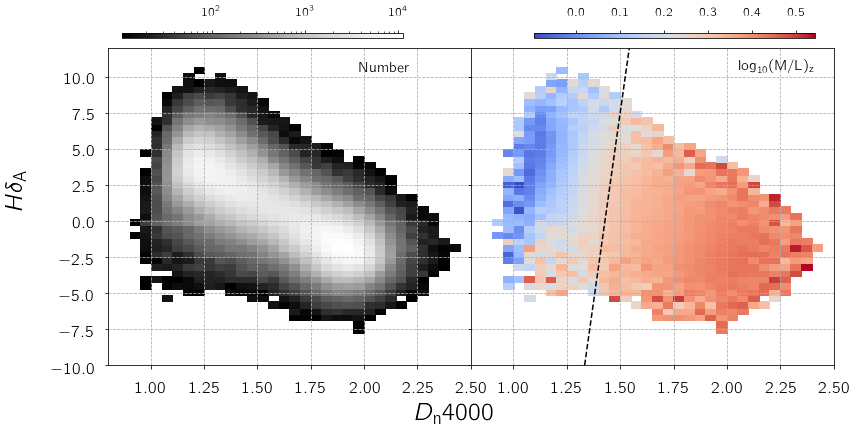

In [56]:
slope = 3*(7.5+10)/(1.5-1.0)
print(slope)
intercept = -10-slope - 35
print(intercept)

df = df[df['lick_hd_a']>-10][df['lick_hd_a']<=12]
df = df[df['d4000_n']>0.5][df['lick_hd_a']<=12]
print(len(df))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,7))
t1 = binned_statistic_2d(df['d4000_n'], df['lick_hd_a'],
                         df['mlratio_z'],statistic = 'mean',bins=(50,50))

yedges1 = t1[1]
xedges1 = t1[2]
tcount = binned_statistic_2d(df['d4000_n'], df['lick_hd_a'],
                             df['mlratio_z'],statistic = 'count',bins=(yedges1,xedges1))

number = np.ma.array(tcount[0], mask = tcount[0] <= 10)
mass = np.ma.array(t1[0], mask = tcount[0] <= 10)

cs1 = ax1.pcolormesh(yedges1,xedges1,np.transpose(number), cmap = plt.cm.Greys_r, norm = LogNorm())
ax1.grid(linestyle = '--')
ax1.set_xlim(0.8,2.5)
ax1.set_ylim(-10,12)
#ax1.xaxis.set_ticklabels([1,1.25,1.5,2,2.25])

cs2 = ax2.pcolormesh(yedges1,xedges1,(np.transpose(mass)), cmap = plt.cm.coolwarm)
ax2.grid(linestyle = '--')
ax2.yaxis.set_ticklabels([])
ax2.set_xlim(0.8,2.5)
ax2.set_ylim(-10,12)
ax2.plot([1.0, 2.5],[slope+intercept,slope*2.5+intercept], linestyle = '--', color = 'k')

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.84, 0.79, r'${\rm log}_{10}(\rm M/L)_{z}$',
         ha='center', va='center', fontsize = 15)
fig.text(0.42, 0.79, 'Number',
         ha='center', va='center', fontsize = 15)
fig.text(0.495, 0.1, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.03, 0.55, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83, bottom = 0.2)
plt.savefig('/Users/Nitya/Desktop/hd_d4000_mlratio_coarser_binning.pdf')
plt.show()

In [57]:
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))


def meanfunc(column, df):
    newdf1 = df.query('hd_z - @slope*d4_z < @intercept')
    newdf2 = df.query('hd_z - @slope*d4_z > @intercept')
    print(column, 'mean')
    print(np.mean(newdf1[column]), np.mean(newdf2[column]))
    return np.mean(newdf1[column]), np.mean(newdf2[column])
def medianfunc(column, df):
    newdf1 = df.query('hd_z - @slope*d4_z < @intercept')
    newdf2 = df.query('hd_z - @slope*d4_z > @intercept')
    print(column, 'median')
    print(np.median(newdf1[column]), np.median(newdf2[column]))
    return np.median(newdf1[column]), np.median(newdf2[column])
def stdfunc(column, df):
    newdf1 = df.query('hd_z - @slope*d4_z < @intercept')
    newdf2 = df.query('hd_z - @slope*d4_z > @intercept')
    print(column, 'sd')
    print(np.std(newdf1[column]), np.std(newdf2[column]))
    return np.std(newdf1[column]), np.std(newdf2[column])
def madfunc(column, df):
    newdf1 = df.query('hd_z - @slope*d4_z < @intercept')
    newdf2 = df.query('hd_z - @slope*d4_z > @intercept')
    print(column, 'median absolute deviation')
    print(mad(newdf1[column]), mad(newdf2[column]))
    return mad(newdf1[column]), mad(newdf2[column])


In [58]:
d2.columns

Index(['Unnamed: 0', 'plate_ifu', 'z', 'hd_z', 'd4_z', 'hd_all', 'd4_all',
       'offset_hd', 'offset_d4', 'mlz_z', 'mlz_all', 'offset_mlz'],
      dtype='object')

In [59]:
stdfunc('offset_hd',d2)
stdfunc('offset_d4',d2)
meanfunc('offset_hd',d2)
meanfunc('offset_d4',d2)
madfunc('offset_d4',d2)

offset_hd sd
0.9765558079004051 0.9330772445486308
offset_d4 sd
0.10313242578360662 0.067471951331032
offset_hd mean
0.7324654911652281 0.3944746549907091
offset_d4 mean
-0.08024487361411956 -0.024614569325794734
offset_d4 median absolute deviation
0.04637486222522579 0.04035472513687344


(0.04637486222522579, 0.04035472513687344)

In [60]:
meanfunc('mlz_z', d2)
meanfunc('mlz_all', d2)
meanfunc('offset_mlz',d2)
print('----')

stdfunc('offset_mlz',d2)
madfunc('offset_mlz',d2)


mlz_z mean
0.36061054930459085 0.12077548747254604
mlz_all mean
0.3334571080316983 0.0953228998299971
offset_mlz mean
-0.02715344127289251 -0.025452587642548936
----
offset_mlz sd
0.18131412751926765 0.26728391174139526
offset_mlz median absolute deviation
0.08004154846200001 0.1403211132812


(0.08004154846200001, 0.1403211132812)

In [62]:
newdf1 = d1.query('hd_z - @slope*d4_z < @intercept')
newdf2 = d1.query('hd_z - @slope*d4_z > @intercept')

mean_mlratio_lesser_1 = np.mean(newdf1['mlz_z'].values)
mean_mlratio_greater_1 = np.mean(newdf2['mlz_z'].values)
mean_offset_lesser_1 = np.mean(newdf1['offset_mlz'].values)
mean_offset_greater_1 = np.mean(newdf2['offset_mlz'].values)
std_offset_lesser_1 = np.std(newdf1['offset_mlz'].values)
std_offset_greater_1 = np.std(newdf2['offset_mlz'].values)


median_mlratio_lesser_1 = np.median(newdf1['mlz_z'].values)
median_mlratio_greater_1 = np.median(newdf2['mlz_z'].values)
median_offset_lesser_1 = np.median(newdf1['offset_mlz'].values)
median_offset_greater_1 = np.median(newdf2['offset_mlz'].values)
mad_offset_lesser_1 = mad(newdf1['offset_mlz'].values)
mad_offset_greater_1 = mad(newdf2['offset_mlz'].values)

print('---- z 0.02 --------')
print(mean_mlratio_lesser_1, mean_mlratio_greater_1)
print(mean_offset_lesser_1, mean_offset_greater_1)
print(std_offset_lesser_1, std_offset_greater_1)
print(mad_offset_lesser_1, mad_offset_greater_1)



newdf1 = d2.query('hd_z - @slope*d4_z < @intercept')
newdf2 = d2.query('hd_z - @slope*d4_z > @intercept')

mean_mlratio_lesser_2 = np.mean(newdf1['mlz_z'].values)
mean_mlratio_greater_2 = np.mean(newdf2['mlz_z'].values)
mean_offset_lesser_2 = np.mean(newdf1['offset_mlz'].values)
mean_offset_greater_2 = np.mean(newdf2['offset_mlz'].values)
std_offset_lesser_2 = np.std(newdf1['offset_mlz'].values)
std_offset_greater_2 = np.std(newdf2['offset_mlz'].values)


median_mlratio_lesser_2 = np.median(newdf1['mlz_z'].values)
median_mlratio_greater_2 = np.median(newdf2['mlz_z'].values)
median_offset_lesser_2 = np.median(newdf1['offset_mlz'].values)
median_offset_greater_2 = np.median(newdf2['offset_mlz'].values)
mad_offset_lesser_2 = mad(newdf1['offset_mlz'].values)
mad_offset_greater_2 = mad(newdf2['offset_mlz'].values)

print('---- z 0.06 --------')
print(mean_mlratio_lesser_2, mean_mlratio_greater_2)
print(mean_offset_lesser_2, mean_offset_greater_2)
print(std_offset_lesser_2, std_offset_greater_2)
print(mad_offset_lesser_2, mad_offset_greater_2)


newdf1 = d3.query('hd_z - @slope*d4_z < @intercept')
newdf2 = d3.query('hd_z - @slope*d4_z > @intercept')

mean_mlratio_lesser_3 = np.mean(newdf1['mlz_z'].values)
mean_mlratio_greater_3 = np.mean(newdf2['mlz_z'].values)
mean_offset_lesser_3 = np.mean(newdf1['offset_mlz'].values)
mean_offset_greater_3 = np.mean(newdf2['offset_mlz'].values)
std_offset_lesser_3 = np.std(newdf1['offset_mlz'].values)
std_offset_greater_3 = np.std(newdf2['offset_mlz'].values)


median_mlratio_lesser_3 = np.median(newdf1['mlz_z'].values)
median_mlratio_greater_3 = np.median(newdf2['mlz_z'].values)
median_offset_lesser_3 = np.median(newdf1['offset_mlz'].values)
median_offset_greater_3 = np.median(newdf2['offset_mlz'].values)
mad_offset_lesser_3 = mad(newdf1['offset_mlz'].values)
mad_offset_greater_3 = mad(newdf2['offset_mlz'].values)

print('---- z 0.14 --------')
print(mean_mlratio_lesser_3, mean_mlratio_greater_3)
print(mean_offset_lesser_3, mean_offset_greater_3)
print(std_offset_lesser_3, std_offset_greater_3)
print(mad_offset_lesser_3, mad_offset_greater_3)


---- z 0.02 --------
0.3604041822863329 0.093915868320625
-0.02091106076858789 0.003913876031290365
0.21747301171657285 0.3235594327475411
0.0703025994875 0.15460867175318496
---- z 0.06 --------
0.36061054930459085 0.12077548747254604
-0.02715344127289251 -0.025452587642548936
0.18131412751926765 0.26728391174139526
0.08004154846200001 0.1403211132812
---- z 0.14 --------
0.36554360901647054 0.11755254800318632
-0.017867704480015238 -0.01402277028898465
0.17981777274140276 0.25118426111880104
0.07423968811050002 0.12347432934569998


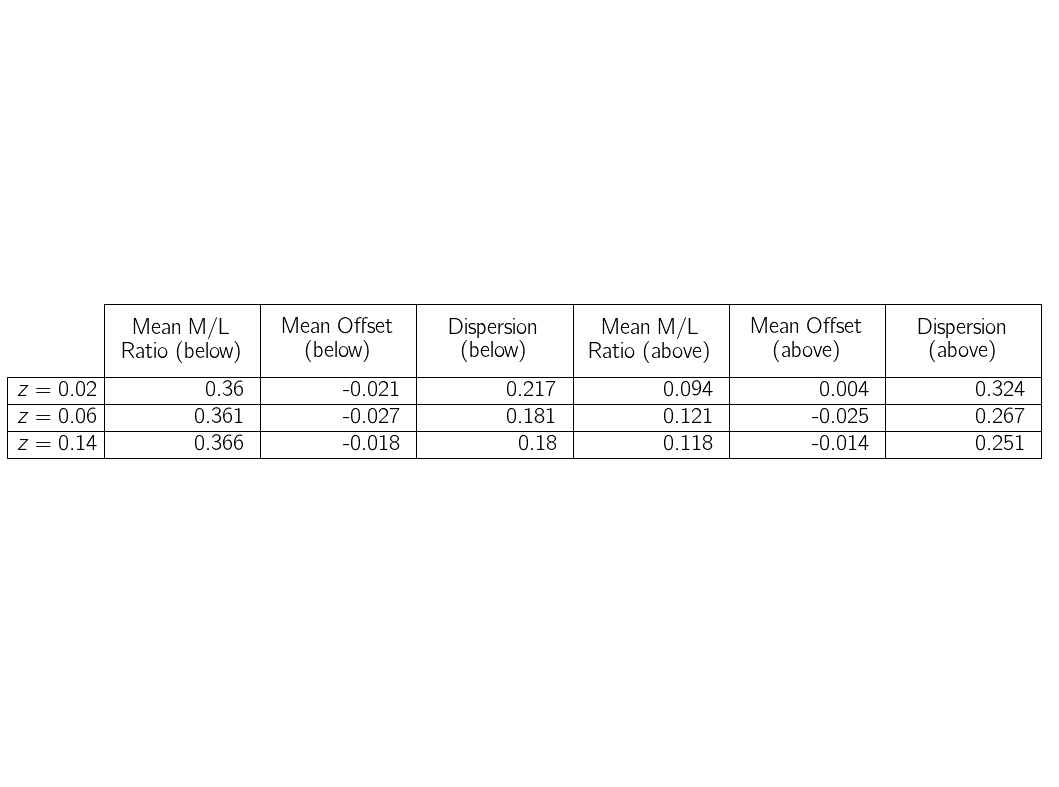

In [63]:
cell_text = [[mean_mlratio_lesser_1 , mean_offset_lesser_1, std_offset_lesser_1, 
              mean_mlratio_greater_1,mean_offset_greater_1, std_offset_greater_1],
            [mean_mlratio_lesser_2 ,mean_offset_lesser_2, std_offset_lesser_2,
              mean_mlratio_greater_2,mean_offset_greater_2, std_offset_greater_2],
             [mean_mlratio_lesser_3 ,mean_offset_lesser_3, std_offset_lesser_3,
              mean_mlratio_greater_3,mean_offset_greater_3, std_offset_greater_3]]
cell_text = np.around(cell_text, decimals = 3)
columns = ['Mean M/L \n Ratio (below)','Mean Offset \n (below)', 'Dispersion \n (below)',
        'Mean M/L \n Ratio (above)','Mean Offset \n (above)', 'Dispersion \n (above)']
rows = [r'$z = 0.02$', r'$z = 0.06$', r'$z = 0.14$']

fig, axs = plt.subplots(figsize = (15,6))
# Hide axes
axs.axis("off") 
#axs.axis('tight')
the_table = axs.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                     loc = 'center')
the_table.set_fontsize(22)
#fig.set_size_inches(w=3, h=2)

cellDict = the_table.get_celld()
for i in range(0,len(columns)):
    cellDict[(0,i)].set_height(.1)
    for j in range(1,len(cell_text)+1):
        cellDict[(j,i)].set_height(.03675)

fig.tight_layout()
plt.subplots_adjust(left=0.1, top= 1.3, bottom = -0.4)
plt.savefig('/Users/Nitya/Desktop/table.pdf')
plt.show()

/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


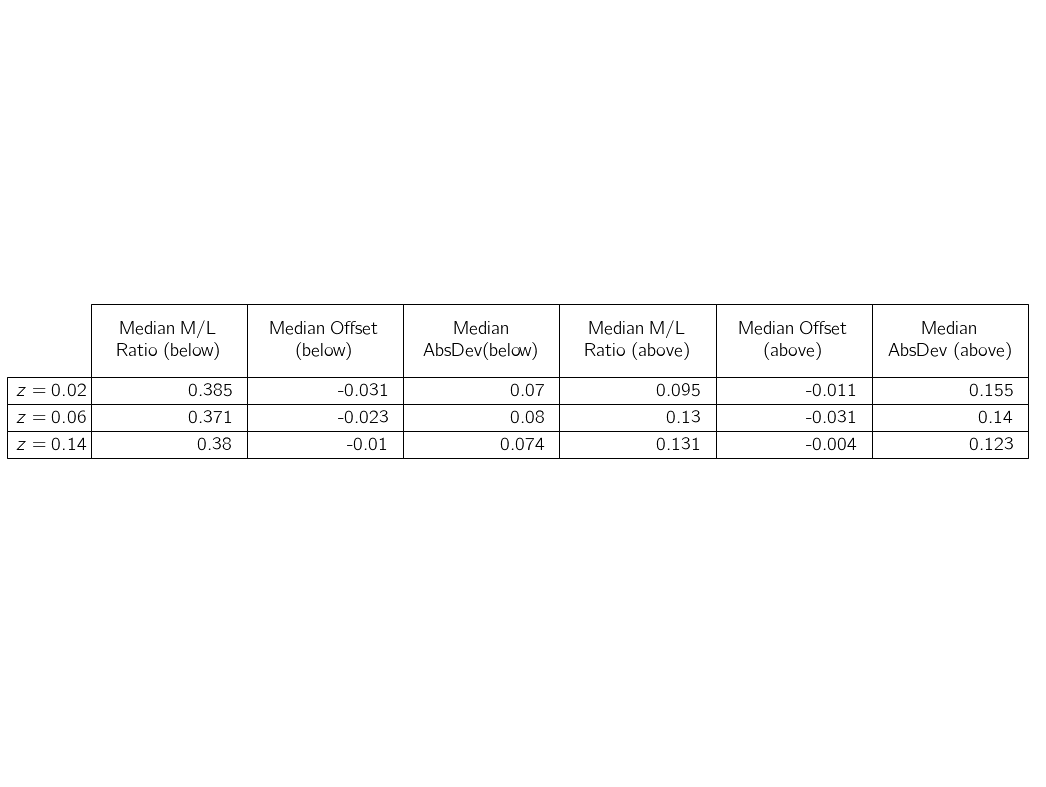

In [64]:
cell_text = [[median_mlratio_lesser_1 , median_offset_lesser_1, mad_offset_lesser_1, 
              median_mlratio_greater_1,median_offset_greater_1, mad_offset_greater_1],
            [median_mlratio_lesser_2 ,median_offset_lesser_2, mad_offset_lesser_2,
              median_mlratio_greater_2,median_offset_greater_2, mad_offset_greater_2],
             [median_mlratio_lesser_3 ,median_offset_lesser_3, mad_offset_lesser_3,
              median_mlratio_greater_3,median_offset_greater_3, mad_offset_greater_3]]
cell_text = np.around(cell_text, decimals = 3)
columns = ['Median M/L \n Ratio (below)','Median Offset \n (below)', 'Median \n AbsDev(below)',
        'Median M/L \n Ratio (above)','Median Offset \n (above)', 'Median \n AbsDev (above)']
rows = [r'$z = 0.02$', r'$z = 0.06$', r'$z = 0.14$']

fig, axs = plt.subplots(figsize = (15,6))
# Hide axes
axs.axis("off") 
#axs.axis('tight')
the_table = axs.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc = 'center')
the_table.set_fontsize(22)
#fig.set_size_inches(w=3, h=2)
cellDict = the_table.get_celld()
for i in range(0,len(columns)):
    cellDict[(0,i)].set_height(.1)
    for j in range(1,len(cell_text)+1):
        cellDict[(j,i)].set_height(.03675)

fig.tight_layout()
plt.subplots_adjust(left=0.1, top= 1.3, bottom = -0.4)
plt.savefig('/Users/Nitya/Desktop/table_median.pdf')
plt.show()